# Notebook récapitulatif

# importer les libraries 

In [70]:

import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# downloading data

In [91]:
with open(rf"C:\Users\noara\Git\waterlevelprediction\data\Adour_Adour__2016-05-27__2025-03-14.json") as f:
    fulljson = json.load(f)

retourne un dictionnaire de size 4 data géometry proprieties et type 

on passe la key data (liste de dictionnaire)  en dataframe avec laquelle on pourra travailler 


In [92]:
df=pd.DataFrame(fulljson["data"]) 

# Data preparation

In [93]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 7 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   identifier                                                 273 non-null    object 
 1   time                                                       273 non-null    float64
 2   datetime                                                   273 non-null    object 
 3   orthometric_height_of_water_surface_at_reference_position  273 non-null    float64
 4   associated_uncertainty                                     273 non-null    float64
 5   satellite                                                  273 non-null    object 
 6   ground-track_number                                        273 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 15.1+ KB
None


In [94]:
df["datetime"] = pd.to_datetime(df["datetime"], format="%Y/%m/%d %H:%M")
categorical_colums = df.select_dtypes(include = ['object']).columns.tolist()

def label_encode_columns(data, columns):
    for col in columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])        
    return data
df = label_encode_columns(df, categorical_colums)

print('apres traitement', df.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 7 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   identifier                                                 273 non-null    int32         
 1   time                                                       273 non-null    float64       
 2   datetime                                                   273 non-null    datetime64[ns]
 3   orthometric_height_of_water_surface_at_reference_position  273 non-null    float64       
 4   associated_uncertainty                                     273 non-null    float64       
 5   satellite                                                  273 non-null    int32         
 6   ground-track_number                                        273 non-null    int64         
dtypes: datetime64[ns](1), float64(3), in

# Visualisations

<AxesSubplot:>

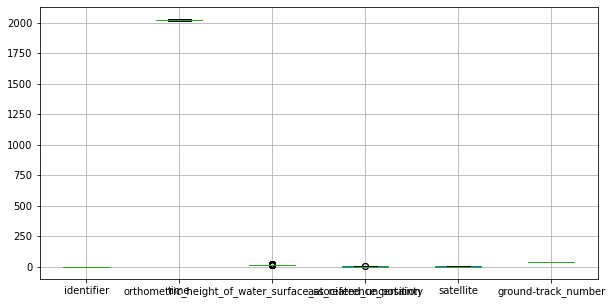

In [95]:

plt.figure(figsize=(10, 5))
df.boxplot()


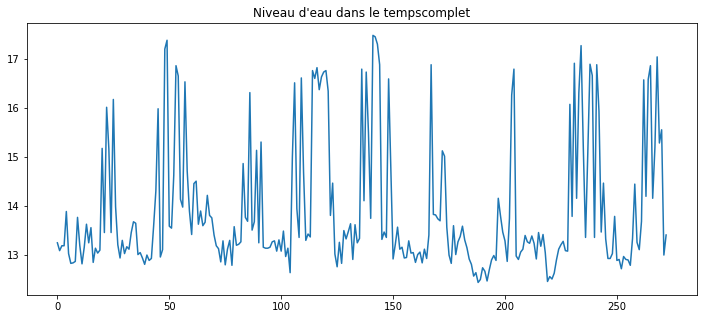

In [96]:

plt.figure(figsize=(10, 5))  # Définir la taille du graphique
df['orthometric_height_of_water_surface_at_reference_position'].plot(figsize=(12, 5), title="Niveau d'eau dans le tempscomplet")
plt.show()


Text(0.5, 1.0, 'Distribution du niveau d’eau')

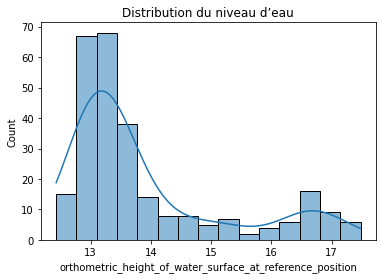

In [97]:
sns.histplot(df['orthometric_height_of_water_surface_at_reference_position'], kde=True)
plt.title("Distribution du niveau d’eau")

<AxesSubplot:title={'center':'Top 10 pics de niveau'}, xlabel='datetime'>

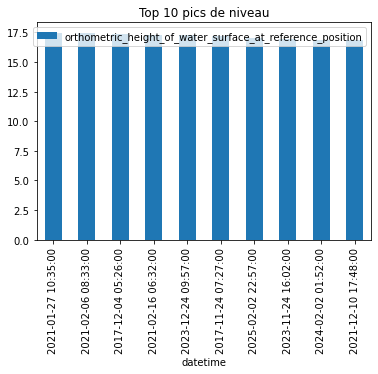

In [98]:
top10 = df.sort_values(by='orthometric_height_of_water_surface_at_reference_position', ascending=False).head(10)
top10.plot(x='datetime', y='orthometric_height_of_water_surface_at_reference_position', kind='bar', title='Top 10 pics de niveau')

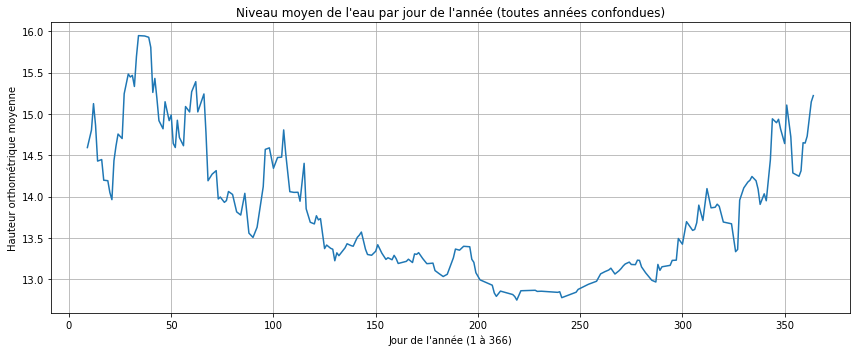

In [99]:
df = df.set_index('datetime')

# On crée une colonne "jour de l'année" (1 à 366)
df['day_of_year'] = df.index.dayofyear

# On calcule la moyenne pour chaque jour de l'année sur toutes les années
daily_avg = df.groupby('day_of_year')['orthometric_height_of_water_surface_at_reference_position'].mean()

# Visualisation
plt.figure(figsize=(12, 5))
plt.plot(daily_avg.rolling(7).mean())  # moyenne glissante sur 7 jours
plt.title("Niveau moyen de l'eau par jour de l'année (toutes années confondues)")
plt.xlabel("Jour de l'année (1 à 366)")
plt.ylabel("Hauteur orthométrique moyenne")
plt.grid(True)
plt.tight_layout()
plt.show()

In [100]:
plt.figure(figsize=(14,6))
for year in sorted(df['year'].unique()):
    yearly_data = df[df['year'] == year]
    plt.plot(yearly_data['day_of_year'], yearly_data['orthometric_height_of_water_surface_at_reference_position'], label=str(year))

plt.title("Profil journalier du niveau d’eau par année")
plt.xlabel("Jour de l’année")
plt.ylabel("Hauteur orthométrique (m)")
plt.legend(title="Année", loc="upper right", fontsize=9)
plt.tight_layout()
plt.show()

KeyError: 'year'

<Figure size 1008x432 with 0 Axes>

Text(0.5, 1.0, 'Boxplot du niveau d’eau par mois')

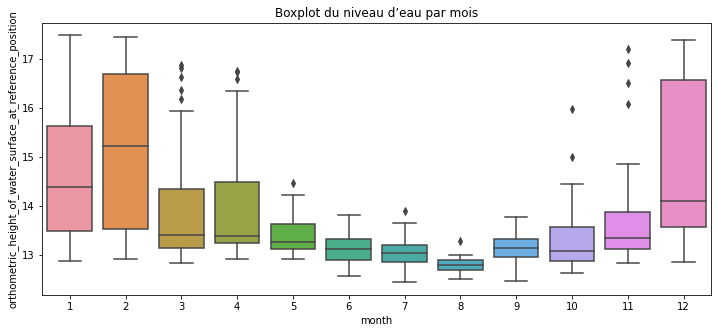

In [ ]:
df['month'] = df.index.month

plt.figure(figsize=(12, 5))
sns.boxplot(x='month', y='orthometric_height_of_water_surface_at_reference_position', data=df)
plt.title("Boxplot du niveau d’eau par mois")

# scénarios d’entrée

<Figure size 720x360 with 0 Axes>

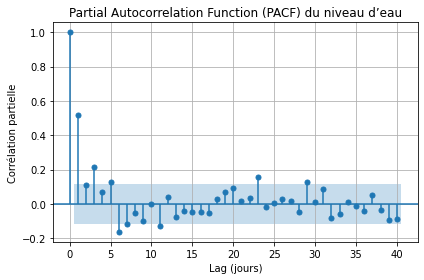

In [101]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Assure-toi que les données sont bien ordonnées par date
df = df.sort_index()

# Trace de la PACF pour la série de niveau d’eau
plt.figure(figsize=(10, 5))
plot_pacf(df['orthometric_height_of_water_surface_at_reference_position'], lags=40, method='ywm')
plt.title("Partial Autocorrelation Function (PACF) du niveau d’eau")
plt.xlabel("Lag (jours)")
plt.ylabel("Corrélation partielle")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
X = df[['lag_1', 'lag_2', 'lag_3', 'lag_5']]



RMSE : 1.324
R² : 0.240


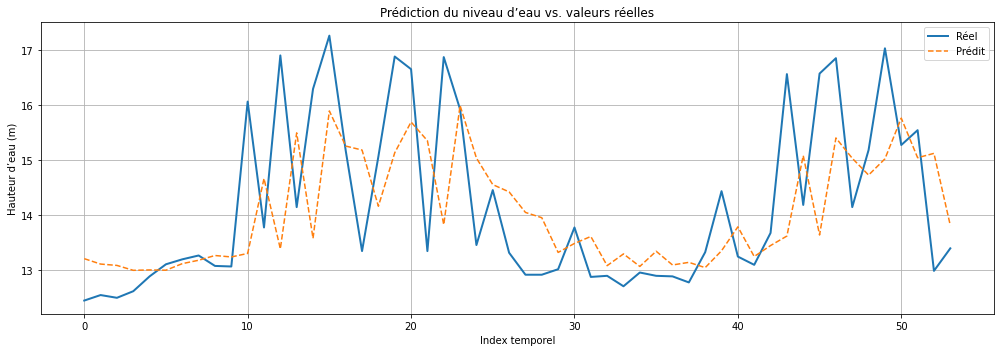

In [102]:
df['lag_1'] = df['orthometric_height_of_water_surface_at_reference_position'].shift(1)
df['lag_2'] = df['orthometric_height_of_water_surface_at_reference_position'].shift(2)
df['lag_3'] = df['orthometric_height_of_water_surface_at_reference_position'].shift(3)
df['lag_5'] = df['orthometric_height_of_water_surface_at_reference_position'].shift(5)
df['target'] = df['orthometric_height_of_water_surface_at_reference_position']

df_model = df[['target', 'lag_1', 'lag_2', 'lag_3', 'lag_5']].dropna()

X = df_model[['lag_1', 'lag_2', 'lag_3', 'lag_5']]
y = df_model['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.3f}")
print(f"R² : {r2:.3f}")


import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test.values, label='Réel', linewidth=2)
plt.plot(y_pred, label='Prédit', linestyle='--')
plt.legend()
plt.title("Prédiction du niveau d’eau vs. valeurs réelles")
plt.xlabel("Index temporel")
plt.ylabel("Hauteur d’eau (m)")
plt.grid(True)
plt.tight_layout()
plt.show()


